# I- Supervised learning

##**1 - Classification**

## Implement classification of particles captured by a telescope
### The target is the class column of the dataset, it has two values : gamma or hadron

### 1- Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### 2- Importing dataset

In [ ]:
#the data does not have column names so we have to add them
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('magic04.data', names= cols)
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


### 3- Cleaning data

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

#### g : gamma , h : hadron
#### transform these values into numerical ones

In [ ]:
#if class==g : True astype int : 1
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#### Plotting some cols for data visualazing

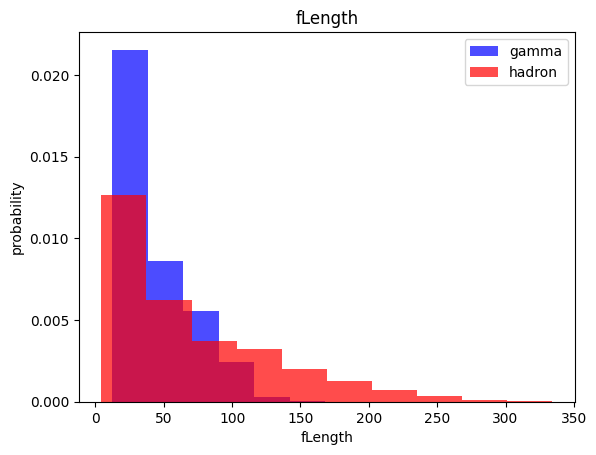

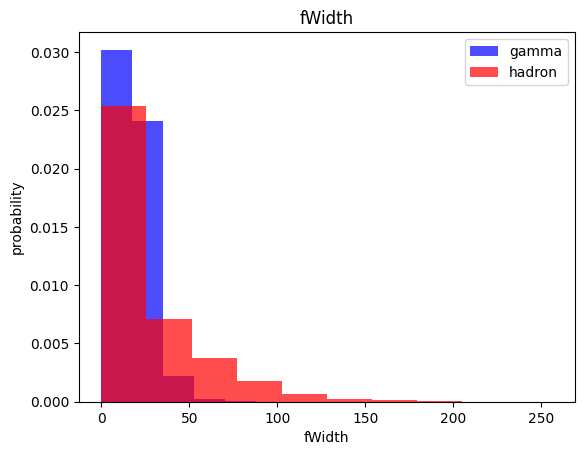

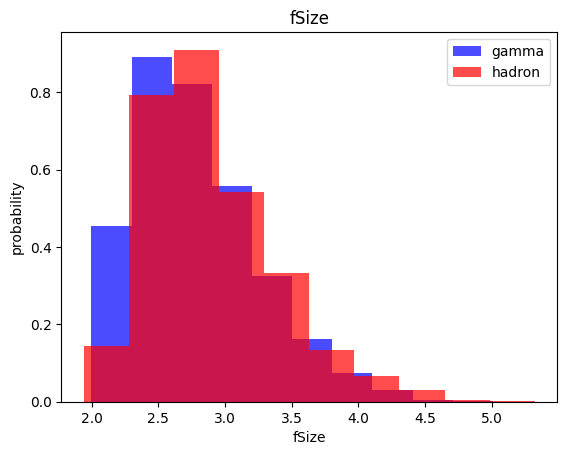

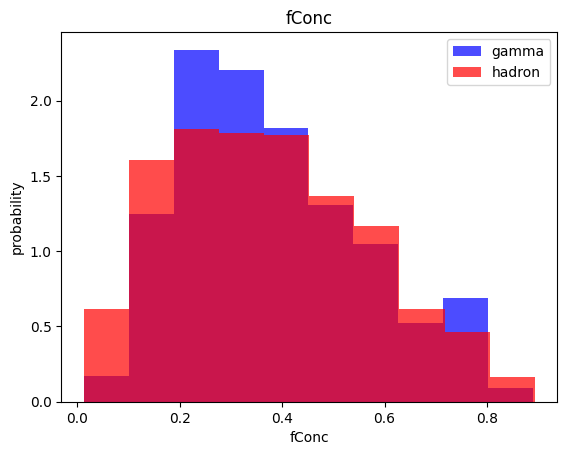

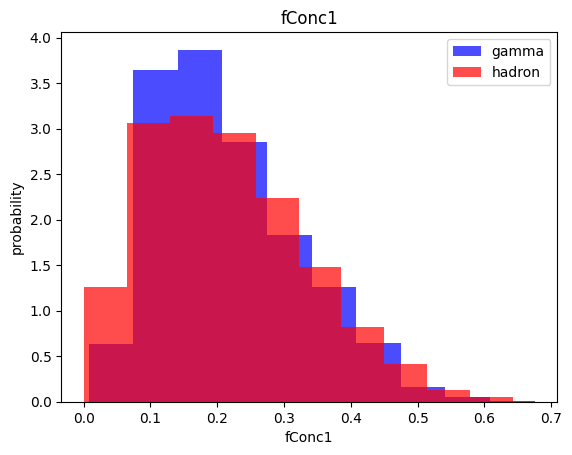

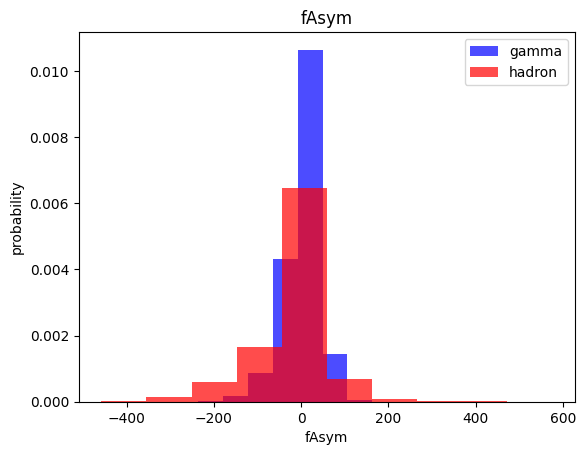

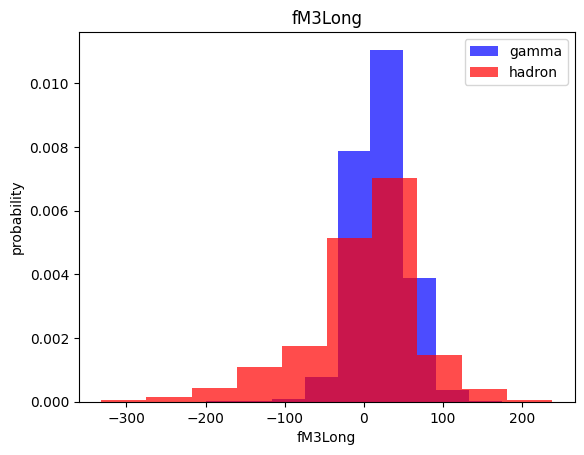

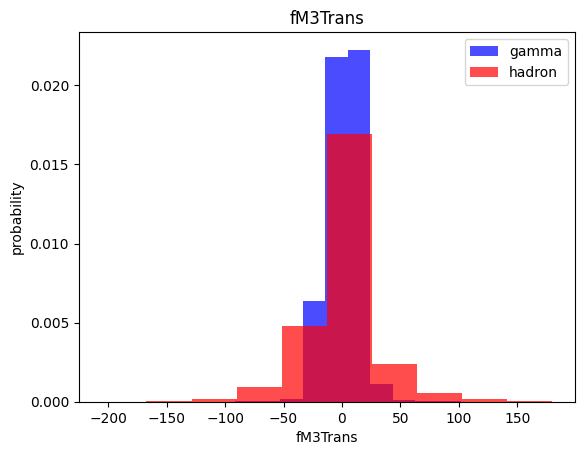

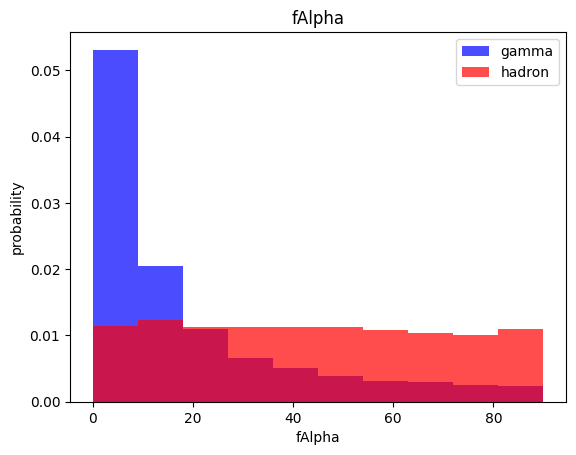

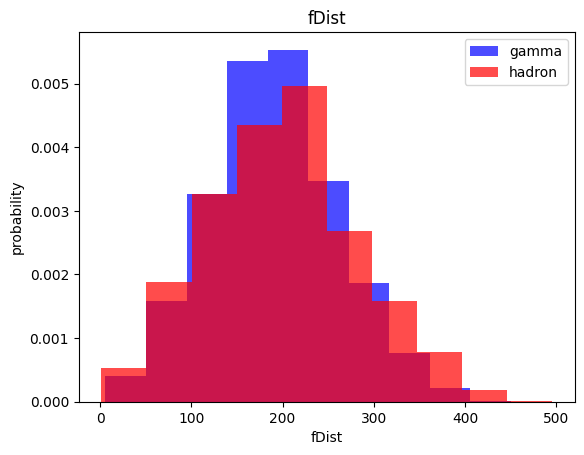

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue', label='gamma',  alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label],color='red', label='hadron',  alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

### 4- Split dataset using numpy
#### split into train, test and validation

In [ ]:
#frac : random
#60% for train
#20% for valid
#20% for test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

#### a function to split the dfs to X and y and make the number of rows with gamma class equal to rows with hadron class with the ros

In [ ]:
def scale_dataset(df, oversample = False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## 5- Building models

### A- KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      1315
           1       0.87      0.83      0.85      2489

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### B- Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1315
           1       0.74      0.90      0.81      2489

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### C- Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1315
           1       0.85      0.82      0.83      2489

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



### D-  Support Vector Machines (SVMs)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1315
           1       0.89      0.89      0.89      2489

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### E- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1315
           1       0.86      0.85      0.86      2489

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### F- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1315
           1       0.89      0.91      0.90      2489

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



### G- Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history["loss"], label='loss')
    ax1.plot(history.history["val_loss"], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label='accuracy')
    ax2.plot(history.history["val_accuracy"], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()


#### num_nodes: This is an integer parameter that specifies the number of nodes in each hidden layer of the neural network. The same number of nodes is used for both hidden layers.

#### dropout_prob: This is a float parameter that specifies the probability of dropout regularization, which helps prevent overfitting by randomly dropping out a fraction of the inputs during training. A value between 0 and 1 can be used, where 0 means no dropout regularization and 1 means dropping out all inputs.

#### learn_rate: This is a float parameter that specifies the learning rate for the Adam optimizer, which is used to optimize the model during training. A higher learning rate can result in faster convergence, but may also lead to instability and divergence. A lower learning rate can result in slower convergence, but may be more stable.

#### batch_size: This is an integer parameter that specifies the number of samples in each mini-batch used for stochastic gradient descent. Using mini-batches can speed up the training process and reduce memory requirements.

#### epochs: This is an integer parameter that specifies the number of times the entire training dataset is passed through the model during training. A larger number of epochs can result in better performance, but may also lead to overfitting if not properly regularized.

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_porb, learn_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_porb),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_porb),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

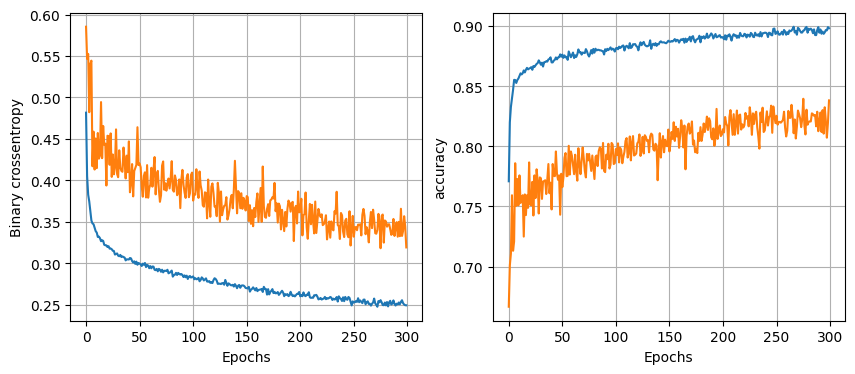

In [ ]:
nn_model, history = train_model(X_train, y_train, 64, 0.2, 0.001, 64, 300)
plot_history(history)

In [ ]:
y_pred = nn_model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(y_pred)

119/119 [==============================] - 1s 2ms/step
[[0.6101811 ]
 [0.9184421 ]
 [0.997858  ]
 ...
 [0.9755882 ]
 [0.92884254]
 [0.9941625 ]]
[1 1 1 ... 1 1 1]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1355
           1       0.87      0.94      0.91      2449

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



## 6- Accuracy summuary :
#### Rand Forest: 88%
#### Nueral Net:  87%
#### SVM :        86%
#### KNN (k=10) : 82%
#### Dec Tree :   80%
#### Log Reg :    79%
#### Naive Bayes: 71%

##**2 - Linear Regression**

### Predicit the number of rented bikes  

### 1- importing libs

In [ ]:
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2- Import dataset

In [ ]:
df = pd.read_csv("sample_data/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

### 3- clean dataset

In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility",
                "dew_pt_temp", "radiation", "rain", "snow", "functional"]

df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]  #use only rows with hour == 12
df = df.drop(["hour"], axis=1)
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


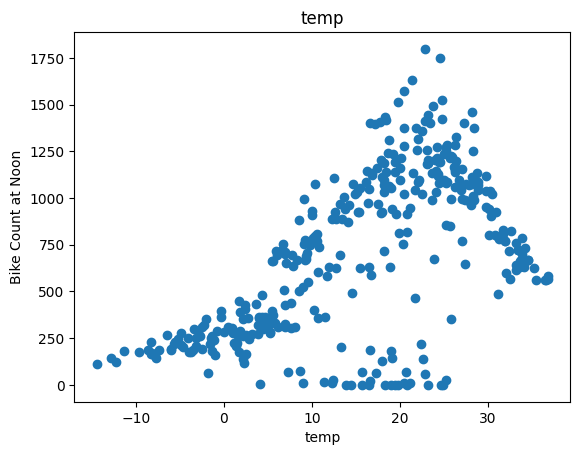

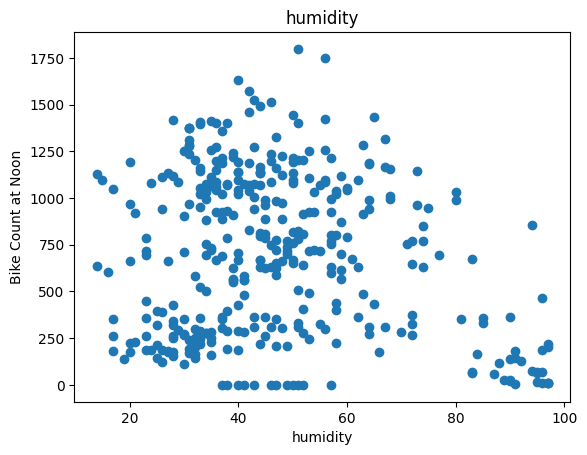

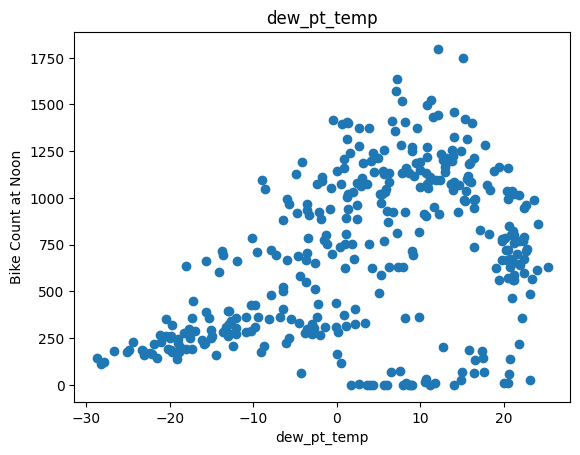

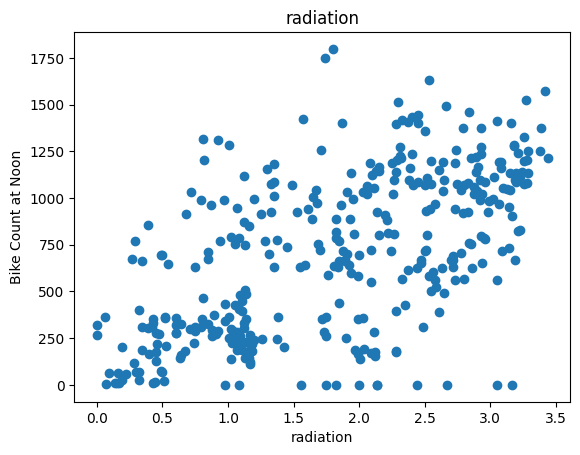

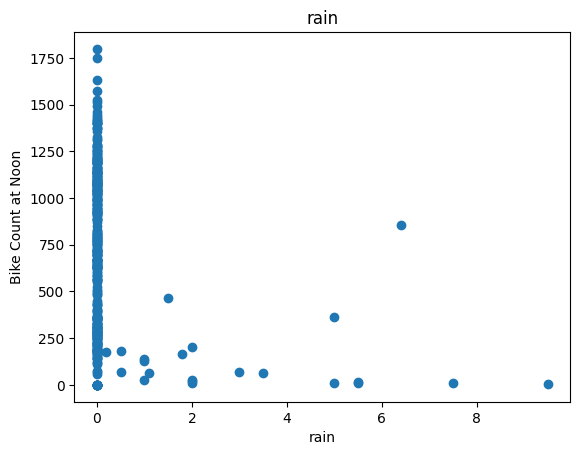

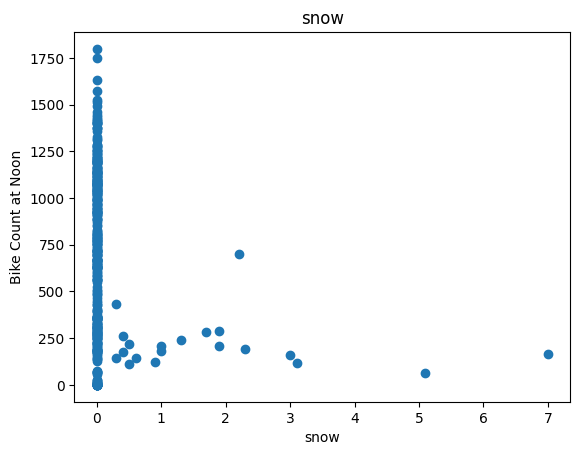

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

### 4- Split dataset into train valid test

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

### 5- implementing regression

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

## One dimension regression

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.18628270443514117

In [ ]:
temp_reg.predict(X_test_temp)

array([[ 596.13488721],
       [ 314.65849632],
       [ 198.63006037],
       [ 896.94935076],
       [ 598.28356195],
       [ 675.63585258],
       [ 426.38958278],
       [ 200.77873511],
       [ 647.70308096],
       [ 456.47102913],
       [ 931.3281466 ],
       [ 705.71729893],
       [ 641.25705674],
       [ 785.2182643 ],
       [ 546.7153682 ],
       [1094.62742681],
       [ 710.01464841],
       [ 525.2286208 ],
       [ 664.89247888],
       [1090.33007733],
       [ 460.76837861],
       [ 817.4483854 ],
       [ 959.26091821],
       [ 574.64813981],
       [1017.27513618],
       [1105.37080051],
       [1167.68236796],
       [1023.7211604 ],
       [ 578.94548929],
       [ 914.13874868],
       [ 750.83946847],
       [ 997.93706353],
       [ 942.0715203 ],
       [ 327.55054475],
       [ 918.43609816],
       [ 789.51561378],
       [ 237.30620569],
       [1094.62742681],
       [ 192.18403616],
       [ 525.2286208 ],
       [1133.30357213],
       [ 894.800

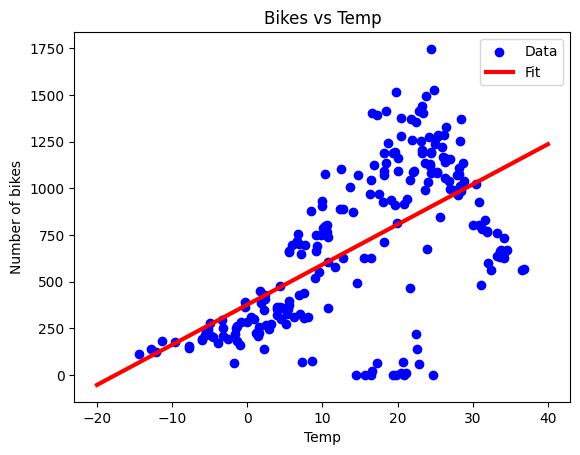

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

## Multiple dimension regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.3995475412054036

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)

In [ ]:
y_pred_lr

array([[ 184.27560851],
       [1074.85752162],
       [ 895.87644206],
       [ 932.75530312],
       [ 779.95114911],
       [ 839.19728735],
       [ 447.85139707],
       [ 691.50953597],
       [1021.76821834],
       [ 829.51343512],
       [ 485.88212072],
       [ 888.76922556],
       [ 950.01440158],
       [ 703.28542369],
       [ 793.02967812],
       [ 401.94979721],
       [1124.89219964],
       [ 734.90156789],
       [ 798.69877933],
       [1008.99525124],
       [ 545.54729493],
       [ 323.93100831],
       [ 369.09987171],
       [ 450.09595969],
       [ 302.98714318],
       [ 809.91460237],
       [ 904.44426603],
       [ 428.86593425],
       [ 274.77509631],
       [ 219.1617269 ],
       [ 737.95103743],
       [ 778.36366557],
       [1038.64706952],
       [ 587.24406947],
       [ 318.17827525],
       [ 384.26856059],
       [1152.11549887],
       [ 459.29731215],
       [ 800.82728638],
       [ 413.4029383 ],
       [1083.5563033 ],
       [ 768.058

## Regression with neural network

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

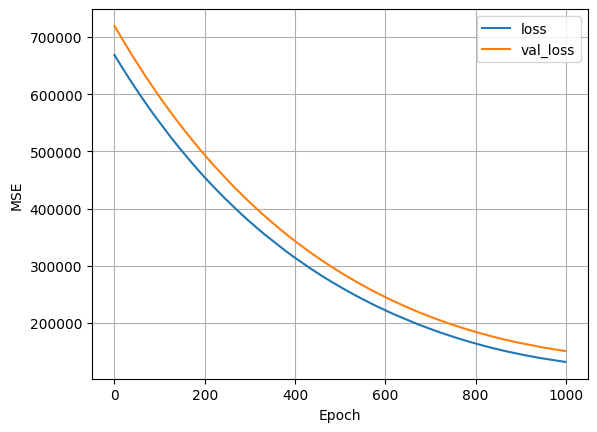

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 8ms/step


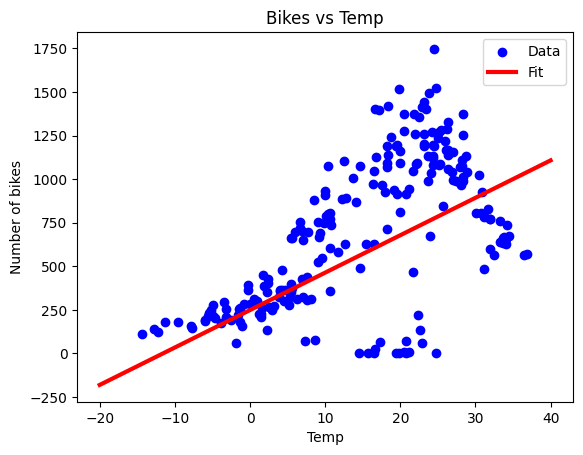

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

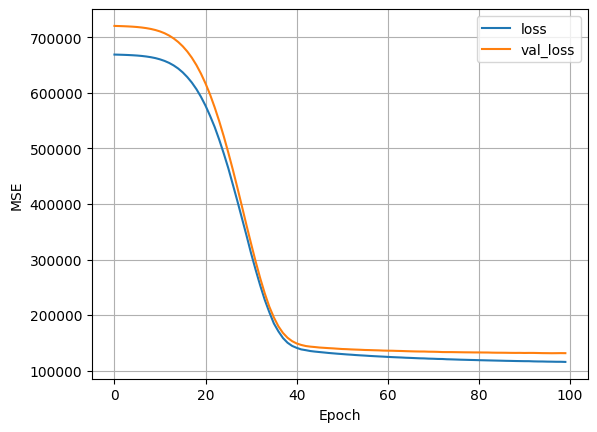

In [ ]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


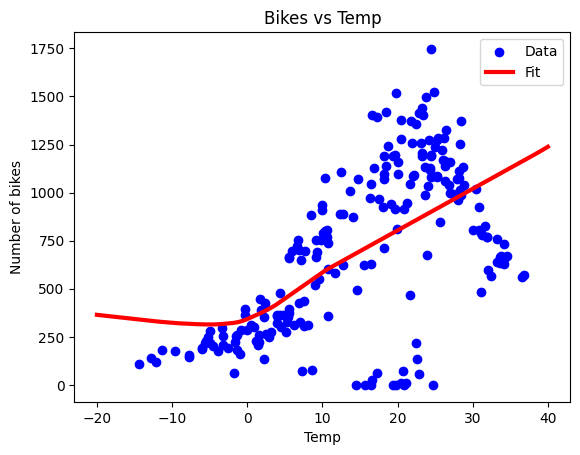

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

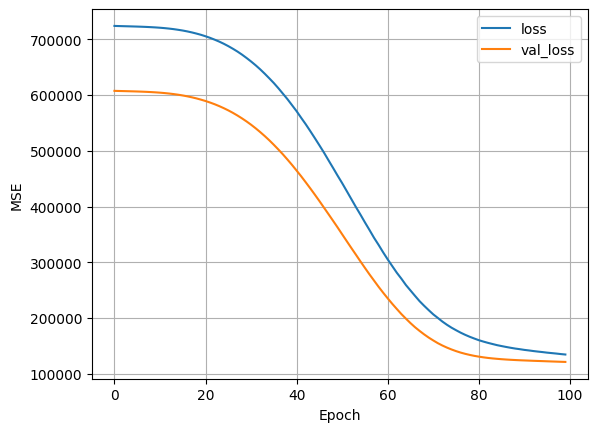

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

plot_loss(history)

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 5ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

97339.0550314351

In [ ]:
MSE(y_pred_nn, y_test_all)

119966.50889550651

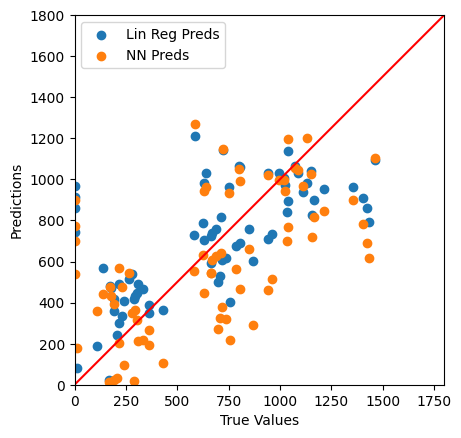

In [ ]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

# II Unsupervised learning

## K Means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("sample_data/seeds_dataset.txt", names=cols, sep="\s+")
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


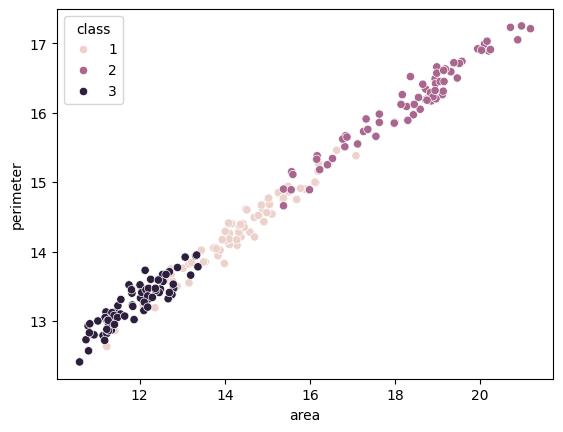

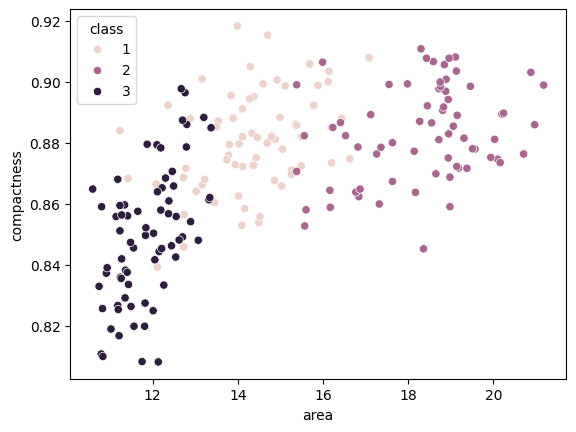

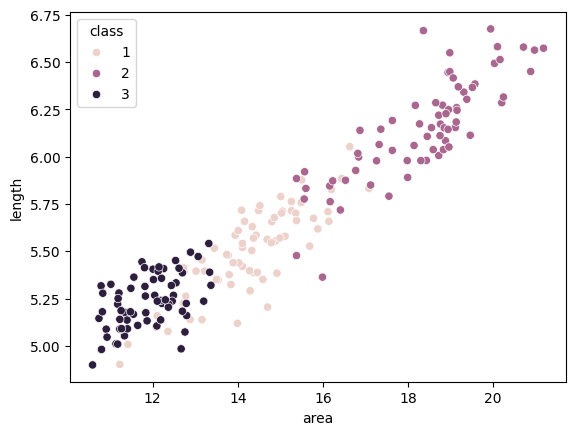

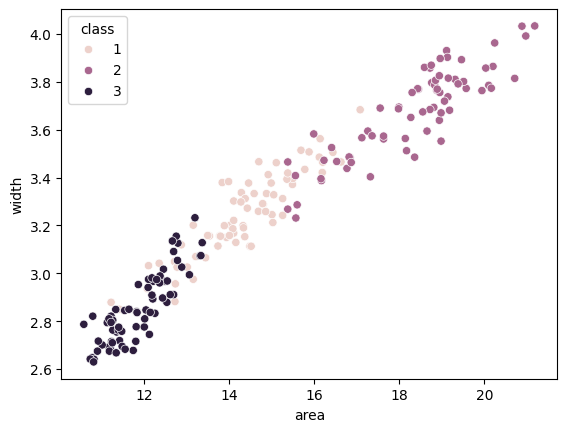

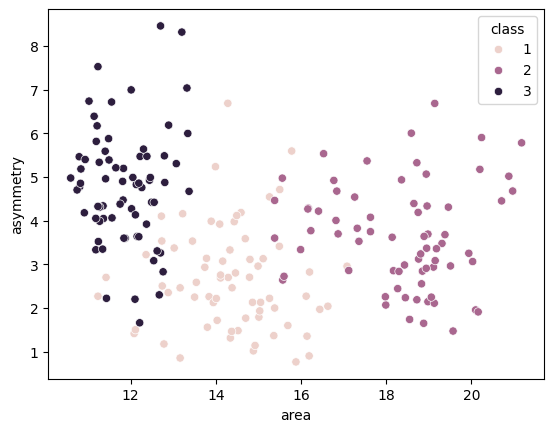

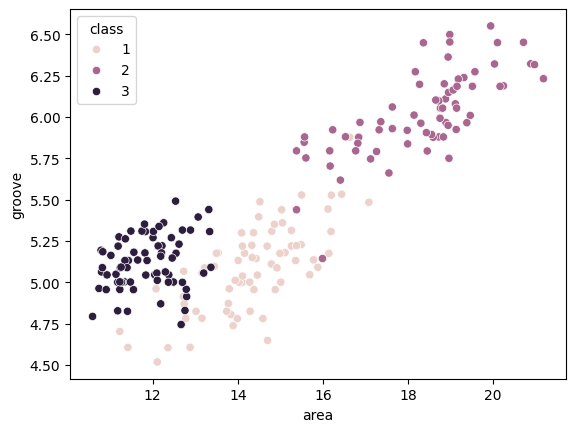

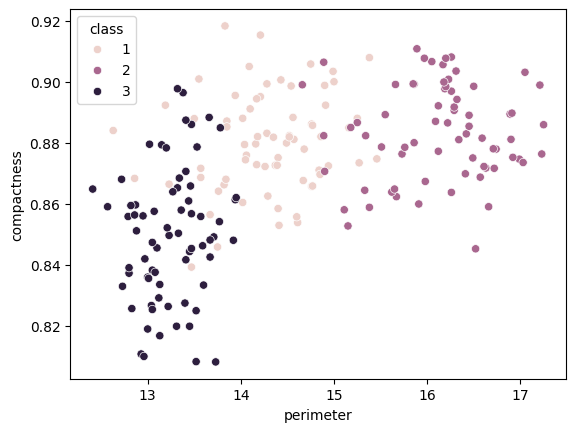

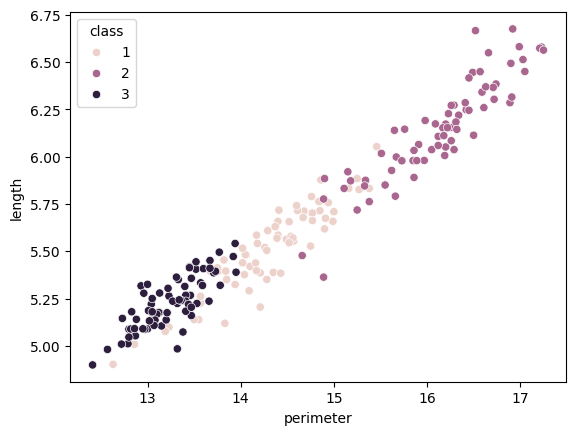

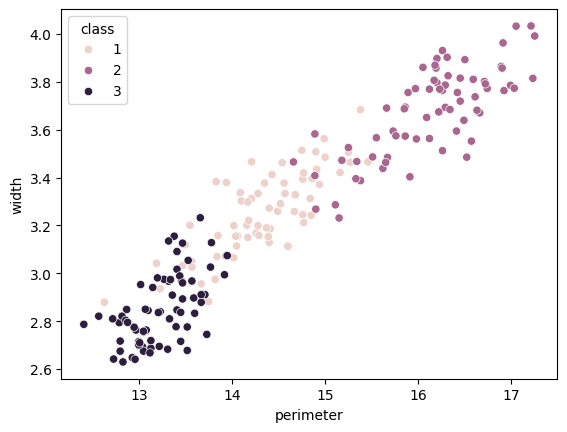

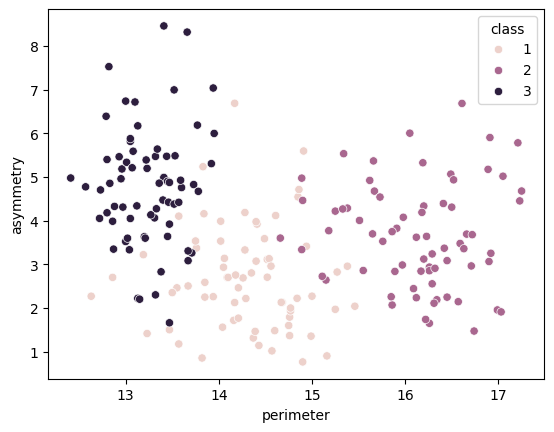

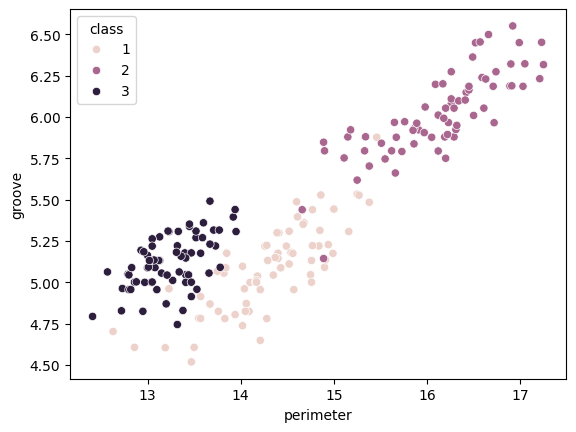

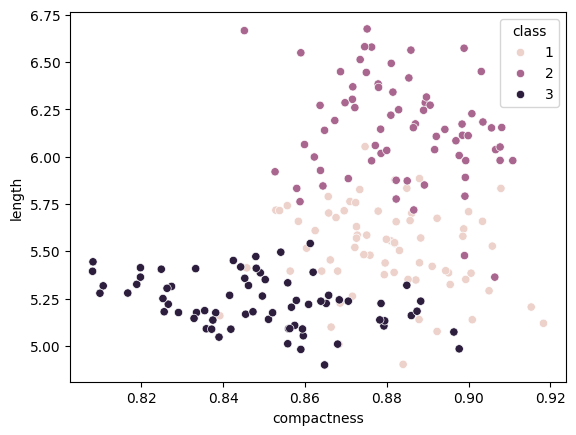

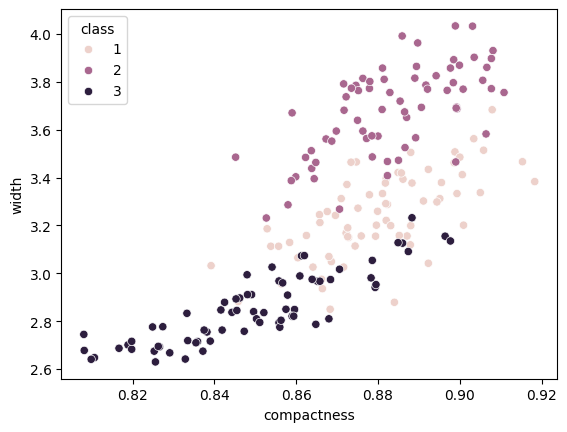

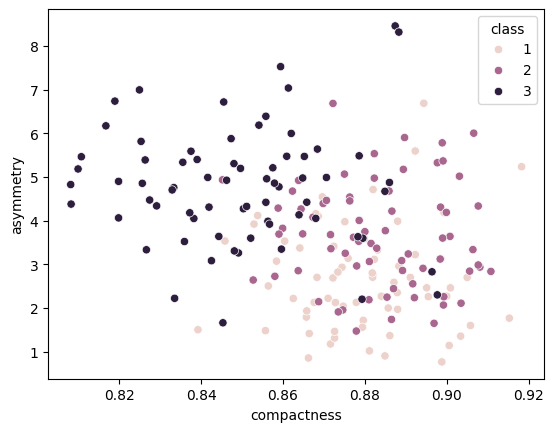

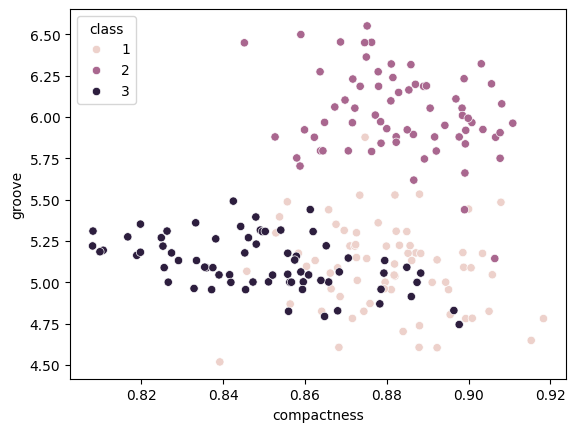

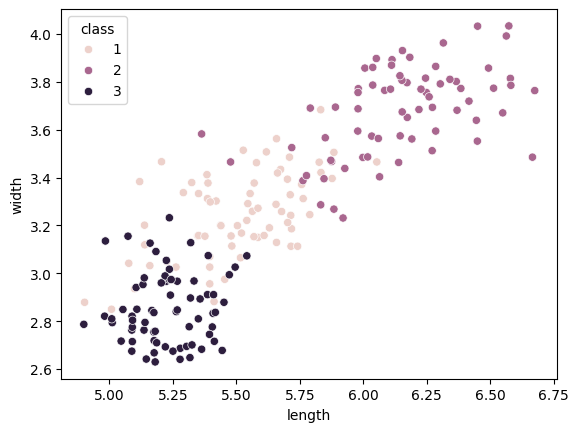

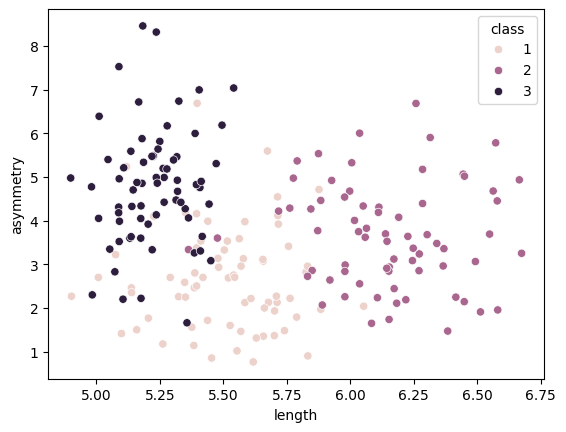

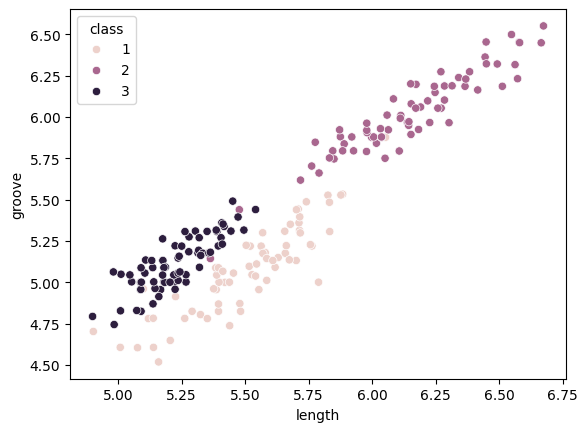

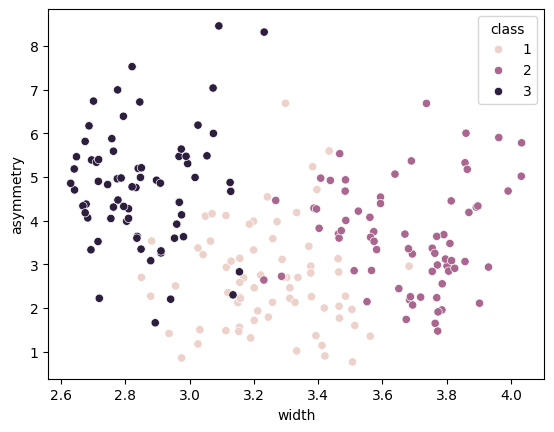

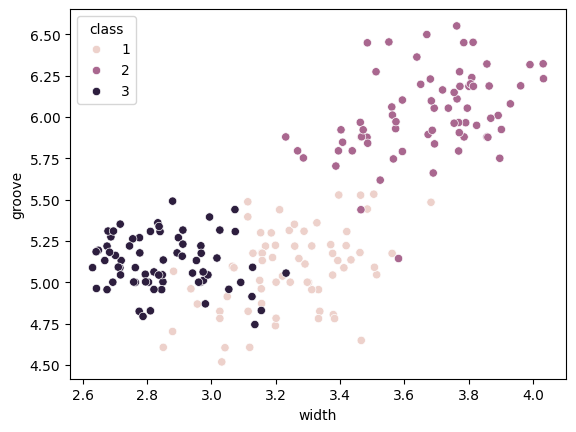

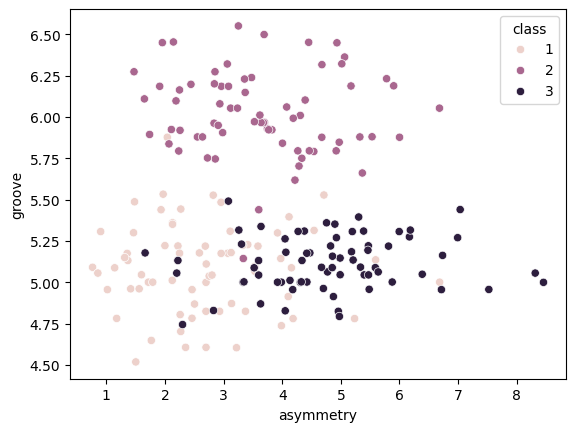

In [6]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

## Clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
x = "compactness"
y = "asymmetry"
X = df[[x, y]].values

In [9]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
clusters = kmeans.labels_

In [11]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

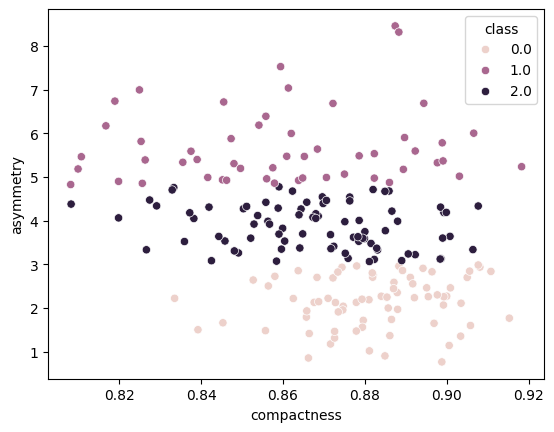

In [12]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

## Higher dimensions

In [16]:
X = df[cols[:-1]].values

In [17]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

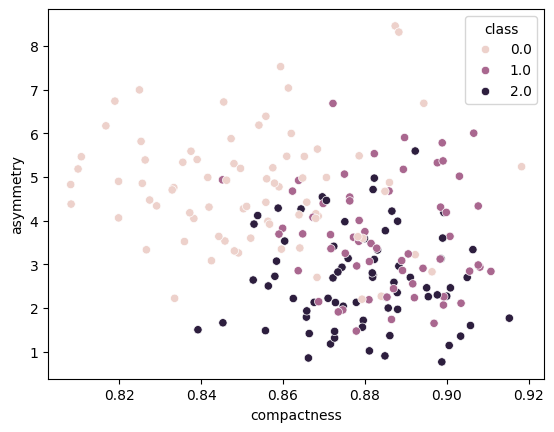

In [20]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

## PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [23]:
X.shape

(210, 7)

In [24]:
transformed_x.shape

(210, 2)

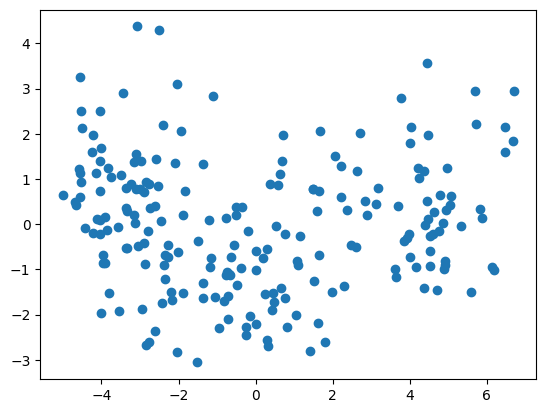

In [31]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [32]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [33]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

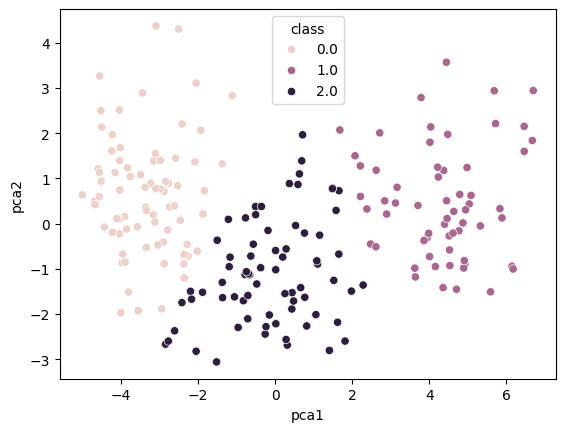

In [34]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

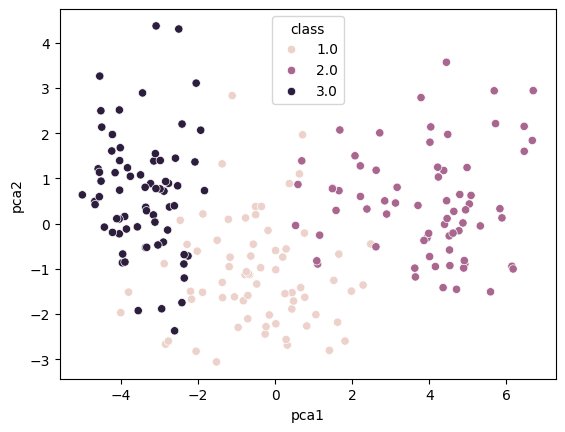

In [35]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()